# **Hubbard triangle**

## CMS Project - TU WIEN
#### Alexander Wurm
#### alexander.wurm@tuwien.ac.at

In [1]:
from config import *
from functions import *

![title](task.png)

In [2]:
# generate states
states = generate_states(N_electrons)

# generate Hamiltonian
Hamiltonian = generate_Hamiltonian(states)

# generate Sz matrix
S = calc_S(states)

In [3]:
printM(states)

⎡0  0  0  0  1  1⎤
⎢                ⎥
⎢0  0  0  1  0  1⎥
⎢                ⎥
⎢0  0  0  1  1  0⎥
⎢                ⎥
⎢0  0  1  0  0  1⎥
⎢                ⎥
⎢0  0  1  0  1  0⎥
⎢                ⎥
⎢0  0  1  1  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  1⎥
⎢                ⎥
⎢0  1  0  0  1  0⎥
⎢                ⎥
⎢0  1  0  1  0  0⎥
⎢                ⎥
⎢0  1  1  0  0  0⎥
⎢                ⎥
⎢1  0  0  0  0  1⎥
⎢                ⎥
⎢1  0  0  0  1  0⎥
⎢                ⎥
⎢1  0  0  1  0  0⎥
⎢                ⎥
⎢1  0  1  0  0  0⎥
⎢                ⎥
⎣1  1  0  0  0  0⎦

In [4]:
# print Hamiltonian matrix
printM(Hamiltonian)

⎡0.0   -1.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                                                        ⎥
⎢-1.0  0.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢1.0   -1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   1.0   -1.0  -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  0.0   -1.0  0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0 ⎥
⎢                                                                                        ⎥
⎢0.0   0.0   0.0   -1.0  -1.0  0.0   0.0   0.0   -1.0  0.0   0.0   0.0   -1.0  0.0   0.0 ⎥

In [5]:
# print Sz matrix
printM(S)

⎡0.333333333333333         0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0         0.333333333333333         0.0         0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0         0.333333333333333  0.0         0.0                 0.0                 0.0          0.0         0.0     
⎢                                                                                                                                              
⎢       0.0                0.0                0.0         0.0         0.0                 0.0                 0.0          0.0         0

In [6]:
# show that [H, Sz] = 0
printM(Hamiltonian*S - S*Hamiltonian)

⎡0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎤
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                         ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢           

**Berechne Sz für U = 1 ... 4:**

In [11]:
U = np.arange(1, 10.1, 0.1)
SUi = []

for Ui in U:    
    # find ground state
    Hamiltonian = generate_Hamiltonian(states, Ui)
    eigval, eigvec = np.linalg.eig(Hamiltonian)       
    eigval_min = np.min(eigval)
  
    # average over all ground states (Entartung)
    cnt = 0
    su_avg = 0

    for i in range(len(eigval)):
        if abs(eigval_min-eigval[i]) < 1e-10:
            cnt += 1
            su_avg = 0
            for i,x in enumerate(eigvec[:,i]):            
                res1 = up(states[i])[0] - down(states[i])[0]
                res2 = up(states[i])[1] - down(states[i])[1]
                res3 = up(states[i])[2] - down(states[i])[2]
                su_avg += x**2 * (res1*res2 + res2*res3 + res3*res1) / NSITES

    SUi.append(su_avg/cnt)

Text(0.5, 1.0, 'spin-spin correlation function $S$ vs. $U$\nN_electrons = 2')

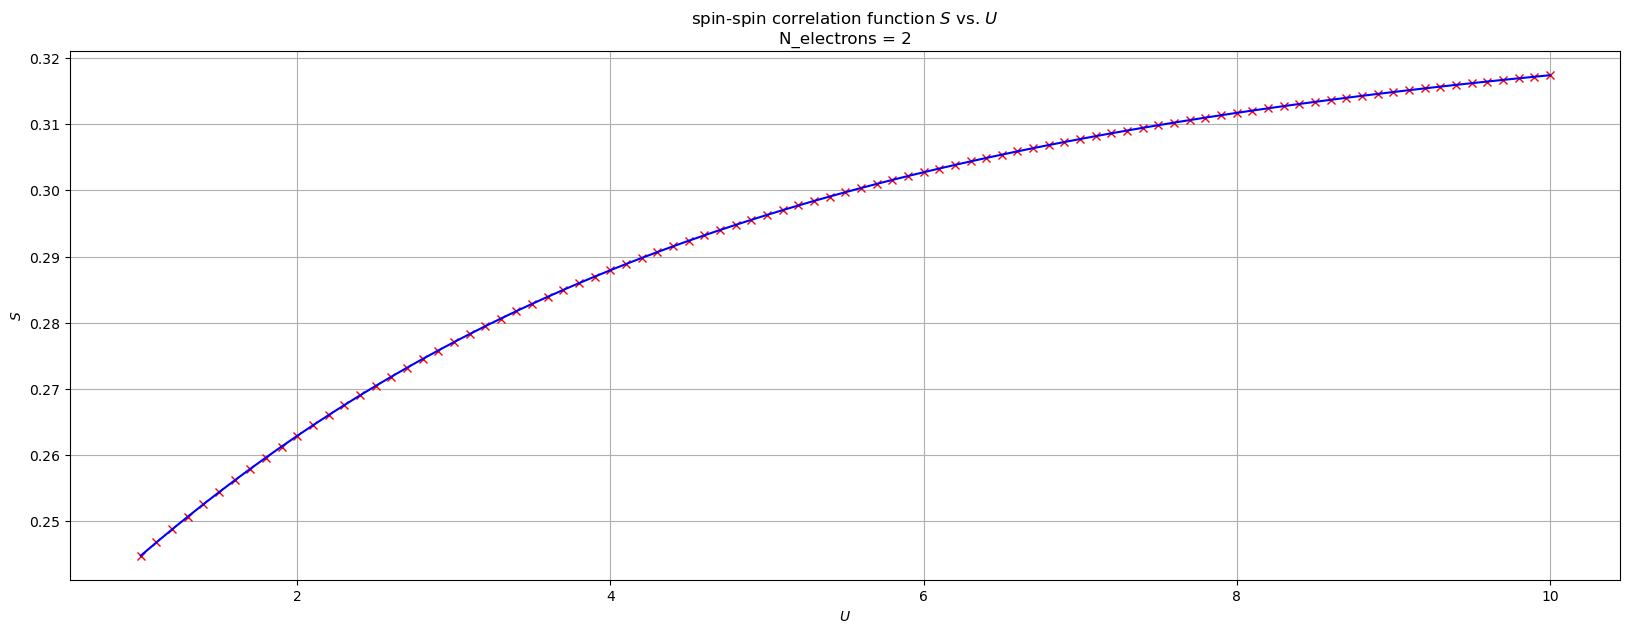

In [12]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 100
plt.plot(U, np.abs(SUi), 'rx')
plt.plot(U, np.abs(SUi), 'b')
plt.grid()
plt.xlabel("$U$")
plt.ylabel(r"$S$")
plt.title(r"spin-spin correlation function $S$ vs. $U$" "\n" "N_electrons = {:g}" .format(N_electrons))